# CSE 5520 Homework 4

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Oct / 3 (Thur), 11:59PM


This is Lynn Pepin's report for CSE 5520 homework 4.

This is being submitted LATE, on October 5th, 2021.

TODOs:

1. Fix degree-of-freedom calculation

2. Finish Part 3

3. Finalize

4. Submit !!!

---

This homework is to help you practice with some data visualization fundamentals. You are
expected to use these visualization techniques and others in your final project. You are required
to do this exercise in Python. All plots/graphs must have titles and x-y coordinate tick labels. 

# Part 1: t-Test and p-value

Consider again the gene expression data sets introduced in Homework 3.

Your analysis is limited to comparing
the Dementia group (GSE44768_CR_alz_female_reduced.csv) and the
Non-Dementia group (GSE44768_CR_nd_female_reduced.csv).

Your study goal is to construct and contrast
a $2 x 2$ plot capturing various t-test outcomes for 2 genes, `LAMP2` and `BSN`.

In terms of the columns of the $2 x 2$ plot,
the first column is to show two histograms in one plot
(red for Dementia and blue for non-Dementia for one gene)
similar to what you practiced in Homework 3.
The second column is to show t-Test PDF.
The steps given below is to guide you how to do this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EPS = 0.0000001
FINAL = False

def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

In [2]:
dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
ndem_df = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')

# Data exploration: Do these all have the same keys?
if not FINAL:
    print(list(dem_df.keys()))
    print("Do these all have the same keys?",
        (dem_df.keys() == ndem_df.keys()).all()
    )

# constants holding all the keys we look at
GENES = [
    'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4',
    'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA',
    'RPS27', 'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2',
    'TUBB4', 'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN',
    'MED6', 'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1',
    'GJA1', 'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN',
    'GLS', 'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1',
    'EGR2', 'PDGFB'
]

['GSM_ID', 'disease', 'age', 'gender', 'pmi', 'pH', 'rin', 'pres', 'batch', 'tissue', 'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27', 'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4', 'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6', 'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1', 'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS', 'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1', 'EGR2', 'PDGFB']
Do these all have the same keys? True


## Step 1.

Create and show two histograms in one plot for the gene `LAMP2` with different colors,
red for the Dementia group and blue for the Non-Dementia group into one plot.
It should be the first subplot of the first 1 x 2 plot.

(array([2., 6., 4., 1., 3., 2., 0., 0., 0., 1.]),
 array([-0.41211723, -0.34976484, -0.28741245, -0.22506005, -0.16270766,
        -0.10035527, -0.03800287,  0.02434952,  0.08670191,  0.14905431,
         0.2114067 ]),
 <BarContainer object of 10 artists>)

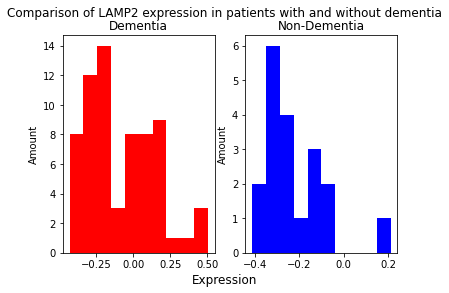

In [3]:
gene = 'LAMP2'
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


fig, axs = plt.subplots(1,2)# sharey=True)
fig.suptitle("Comparison of LAMP2 expression in patients with and without dementia")
#fig.supylabel("")
fig.supxlabel("Expression")

axs[0].set_title("Dementia")
axs[1].set_title("Non-Dementia")
axs[0].set_ylabel("Amount")
axs[1].set_ylabel("Amount")


axs[0].hist(dem_df['LAMP2'], color='red')
axs[1].hist(ndem_df['LAMP2'], color='blue')

## Step 2.

Perform t-Test (**Hint**, unequal variance, unequal sample size) and show PDF.
In the PDF plot, indicate the critical region (significance level $\alpha$ = 0.05)
by placing two dots, arrows or lines near the x-axes.

(You can even color the critical region (area) on the plot if you know how to do
this for **extra credits**
(Note visual communication is the theme of this course).
Coloring the critical region is not required. Then display $t_{obs}$ by placing a different colored dot, arrow or line near the x-axes.)

Using a markdown cell, state if you would reject $H_0$ or not.
$H_0$ is ''The mean values of gene expression between the Dementia group
and Non-Dementia group among female patients are **not different**”
and $H_1$ is “The mean values of gene expression between the Dementia group and
Non-Dementia group among female patients **are different**
(one could be higher or lower than the other)”.

This t-Test’s PDF is the second subplot of the first 1 x 2 plot. The plot
title for the PDF should include the calculated DF (degrees of freedom).

In [4]:
from scipy import stats
alpha = 0.05

t_obs, p_obs = stats.ttest_ind(dem_df['LAMP2'], ndem_df['LAMP2'], equal_var=False)
print(f"t:{t_obs:.3f}, p:{p_obs:.3f}")


dmean = dem_df['LAMP2'].mean()
dstd = dem_df['LAMP2'].std()

ndmean = ndem_df['LAMP2'].mean()
ndstd = ndem_df['LAMP2'].std()

print(f"Alzheimers patients: Mean {dmean:.3f} with std {dstd:.3f}")
print(f"Non-Alzheimers patients: Mean {ndmean:.3f} with std {ndstd:.3f}")

t:3.079, p:0.004
Alzheimers patients: Mean -0.083 with std 0.227
Non-Alzheimers patients: Mean -0.216 with std 0.144


-2.093024054408321 0.024999999999999457
2.093024054408321 0.9750000000000005


Text(0.5, 0, 'Values for means of gene expression')

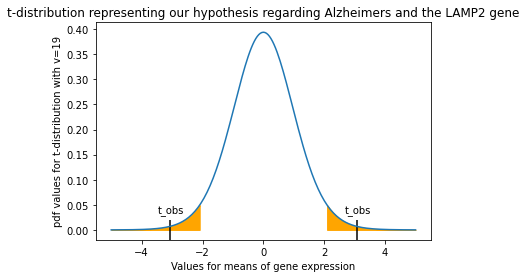

In [6]:
v_obs = min(len(dem_df['LAMP2']), len(ndem_df['LAMP2']))

t_pdf = lambda x: stats.t.pdf(x, df = v_obs)
t_cdf = lambda x: stats.t.cdf(x, df = v_obs)

# Find x such that cdf = 0.025 automatically
def binsearch(func, vv = 0.025, x_l = -100, x_r = 100, eps=0.00001):
    '''
    Search for x such that func(x) == vv,
    within a range of +- eps,
    with x between x_l and x_r.
    '''
    v_l = func(x_l)
    v_r = func(x_r)
    
    x_m = (x_l + x_r)/2
    v_m = func(x_m)
    
    while abs(v_m - vv) >= eps:
        if v_m < vv:
            x_l = x_m
        elif v_m > vv:
            x_r = x_m
        else:
            print("weird, this shouldn't be possible")
            return x_m
            
        v_l = func(x_l)
        v_r = func(x_r)
        x_m = (x_l + x_r)/2
        v_m = func(x_m)
    
    return x_m

xl = binsearch(t_cdf, vv = alpha / 2, eps = 10**-15)
xr = binsearch(t_cdf, vv = 1 - alpha / 2, eps = 10**-15)

if not FINAL:
    print(xl, t_cdf(xl))
    print(xr, t_cdf(xr))

Xs = np.linspace(-5, 5, 201)
Ys = [t_pdf(xx) for xx in Xs]

# Plot the curve
plt.plot(Xs, Ys)

# Shade the region
left_xs = np.linspace(-5, xl, 100)
left_ys = [t_pdf(xx) for xx in left_xs]
plt.fill_between(left_xs, left_ys, color='orange')

left_xs = np.linspace(xr, 5, 100)
plt.fill_between(left_xs, left_ys[::-1], color='orange')

# Draw the markers
plt.scatter(t_obs, 0, s=400, c='black', marker='|')
plt.text(t_obs - .4, t_pdf(t_obs)*5, s="t_obs")

plt.scatter(-t_obs, 0, s=400, c='black', marker='|')
plt.text(-t_obs - .4, t_pdf(t_obs)*5, s="t_obs")

# Misc
plt.title("t-distribution representing our hypothesis regarding Alzheimers and the LAMP2 gene")
plt.ylabel(f"pdf values for t-distribution with v={v_obs}")
plt.xlabel(f"Values for means of gene expression")

Here, we see that $t_obs$ *is* inside the critical region. While the choice of $\alpha$ is arbitrary and controversial, under the choice $\alpha = 0.05$, **we reject the null hypothesis**. That is to say, **we believe the distribution of gene expression for `LAMP2` differs between those with Alzheimers and those without.**

## Step 3.

Repeat Steps 1 and 2 for the gene BSN. This is to generate the second 1 x 2 plot.

t:-0.724, p:0.473
Alzheimers patients: Mean 0.010 with std 0.193
Non-Alzheimers patients: Mean 0.039 with std 0.137


Text(0.5, 0, 'Values for means of gene expression')

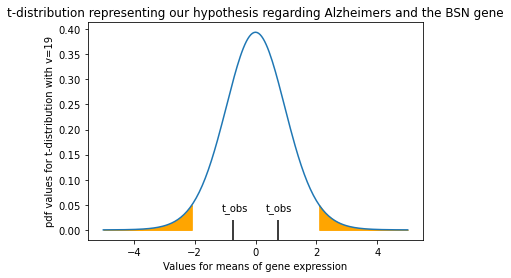

In [8]:
gene_key = 'BSN'
t_obs, p_obs = stats.ttest_ind(dem_df[gene_key], ndem_df[gene_key], equal_var=False)
print(f"t:{t_obs:.3f}, p:{p_obs:.3f}")

dmean = dem_df[gene_key].mean()
dstd = dem_df[gene_key].std()

ndmean = ndem_df[gene_key].mean()
ndstd = ndem_df[gene_key].std()

print(f"Alzheimers patients: Mean {dmean:.3f} with std {dstd:.3f}")
print(f"Non-Alzheimers patients: Mean {ndmean:.3f} with std {ndstd:.3f}")

####

v_obs = min(len(dem_df[gene_key]), len(ndem_df[gene_key]))

t_pdf = lambda x: stats.t.pdf(x, df = v_obs)
t_cdf = lambda x: stats.t.cdf(x, df = v_obs)

xl = binsearch(t_cdf, vv = alpha / 2, eps = 10**-15)
xr = binsearch(t_cdf, vv = 1 - alpha / 2, eps = 10**-15)

Xs = np.linspace(-5, 5, 201)
Ys = [t_pdf(xx) for xx in Xs]

# Plot the curve
plt.plot(Xs, Ys)

# Shade the region
left_xs = np.linspace(-5, xl, 100)
left_ys = [t_pdf(xx) for xx in left_xs]
plt.fill_between(left_xs, left_ys, color='orange')

left_xs = np.linspace(xr, 5, 100)
plt.fill_between(left_xs, left_ys[::-1], color='orange')

# Draw the markers
plt.scatter(t_obs, 0, s=400, c='black', marker='|')
plt.text(t_obs - .4, .04, s="t_obs")

plt.scatter(-t_obs, 0, s=400, c='black', marker='|')
plt.text(-t_obs - .4, .04, s="t_obs")

# Misc
plt.title(f"t-distribution representing our hypothesis regarding Alzheimers and the {gene_key} gene")
plt.ylabel(f"pdf values for t-distribution with v={v_obs}")
plt.xlabel(f"Values for means of gene expression")

From this, we **accept** the null hypothesis. That is, **we do not believe there is a statistically significant difference in the expression of gene `BSN` between those with and those without Alzheimers.**

## Step 4.

Lastly, stack two 1 x 2 plots you created in Steps 1, 2 and 3 “top to bottom”
to create one 2 x 2 plot and display it.
Use a markdown cell and explain how to interpret/contrast the plots you generated.
For example, in which case you would reject/accept H0 and why.

t:3.079, p:0.004
Alzheimers patients: Mean -0.083 with std 0.227
Non-Alzheimers patients: Mean -0.216 with std 0.144
t:-0.724, p:0.473
Alzheimers patients: Mean 0.010 with std 0.193
Non-Alzheimers patients: Mean 0.039 with std 0.137


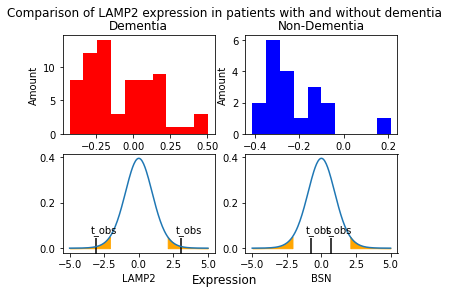

In [9]:
gene = 'LAMP2'
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


fig, axs = plt.subplots(2,2)# sharey=True)
fig.suptitle("Comparison of LAMP2 expression in patients with and without dementia")
#fig.supylabel("")
fig.supxlabel("Expression")

axs[0,0].set_title("Dementia")
axs[0,1].set_title("Non-Dementia")
axs[0,0].set_ylabel("Amount")
axs[0,1].set_ylabel("Amount")


axs[0,0].hist(dem_df['LAMP2'], color='red')
axs[0,1].hist(ndem_df['LAMP2'], color='blue')

###########

for asdf in ((0, 'LAMP2'), (1, 'BSN')):
    idx = asdf[0]
    gene_key = asdf[1]
    
    t_obs, p_obs = stats.ttest_ind(dem_df[gene_key], ndem_df[gene_key], equal_var=False)
    print(f"t:{t_obs:.3f}, p:{p_obs:.3f}")

    dmean = dem_df[gene_key].mean()
    dstd = dem_df[gene_key].std()

    ndmean = ndem_df[gene_key].mean()
    ndstd = ndem_df[gene_key].std()

    print(f"Alzheimers patients: Mean {dmean:.3f} with std {dstd:.3f}")
    print(f"Non-Alzheimers patients: Mean {ndmean:.3f} with std {ndstd:.3f}")

    ####

    v_obs = min(len(dem_df[gene_key]), len(ndem_df[gene_key]))

    t_pdf = lambda x: stats.t.pdf(x, df = v_obs)
    t_cdf = lambda x: stats.t.cdf(x, df = v_obs)

    xl = binsearch(t_cdf, vv = alpha / 2, eps = 10**-15)
    xr = binsearch(t_cdf, vv = 1 - alpha / 2, eps = 10**-15)

    Xs = np.linspace(-5, 5, 201)
    Ys = [t_pdf(xx) for xx in Xs]

    # Plot the curve
    axs[1,idx].plot(Xs, Ys)

    # Shade the region
    left_xs = np.linspace(-5, xl, 100)
    left_ys = [t_pdf(xx) for xx in left_xs]
    axs[1,idx].fill_between(left_xs, left_ys, color='orange')

    left_xs = np.linspace(xr, 5, 100)
    axs[1,idx].fill_between(left_xs, left_ys[::-1], color='orange')

    # Draw the markers
    axs[1,idx].scatter(t_obs, 0, s=400, c='black', marker='|')
    axs[1,idx].text(t_obs - .4, .07, s="t_obs")

    axs[1,idx].scatter(-t_obs, 0, s=400, c='black', marker='|')
    axs[1,idx].text(-t_obs - .4, .07, s="t_obs")

    # Misc
    #axs[1,idx].set_title(f"t_dist for {gene_key}")
    #axs[1,idx].set_ylabel(f"pdf values for t-distribution with v={v_obs}")
    axs[1,idx].set_xlabel(f"{gene_key}")

The top two diagrams show how LAMP2 is expressed differently between Dementia and Non-Dementia groups. It's easy to see their distributions differ, and this is reflected in the bottom-left graph.

The bottom-right graph shows the expression for BSN, notably, with the test-statistic lying outside the critical region.

Knowing this, I can intuit how LAMP2 and BSN differ.

However, I think this visualization could be made more clear. I would overlap the histograms, comparing dementia vs non-dementia in a single cell, and dedicating one column to each gene. Example here:

t:3.079, p:0.004
Alzheimers patients: Mean -0.083 with std 0.227
Non-Alzheimers patients: Mean -0.216 with std 0.144
t:-0.724, p:0.473
Alzheimers patients: Mean 0.010 with std 0.193
Non-Alzheimers patients: Mean 0.039 with std 0.137


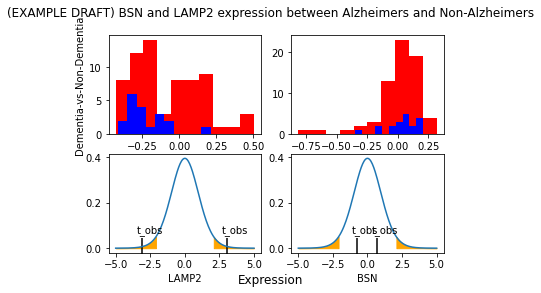

In [10]:
gene = 'LAMP2'
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


fig, axs = plt.subplots(2,2)# sharey=True)
fig.suptitle("(EXAMPLE DRAFT) BSN and LAMP2 expression between Alzheimers and Non-Alzheimers")
#fig.supylabel("")
fig.supxlabel("Expression")

#"axs[0,0].set_title("Dementia")
#axs[0,1].set_title("Non-Dementia")
axs[0,0].set_ylabel("Dementia-vs-Non-Dementia")
#axs[0,1].set_ylabel("Amount")


axs[0,0].hist(dem_df['LAMP2'], color='red')
axs[0,0].hist(ndem_df['LAMP2'], color='blue')

axs[0,1].hist(dem_df['BSN'], color='red')
axs[0,1].hist(ndem_df['BSN'], color='blue')

###########

for asdf in ((0, 'LAMP2'), (1, 'BSN')):
    idx = asdf[0]
    gene_key = asdf[1]
    
    t_obs, p_obs = stats.ttest_ind(dem_df[gene_key], ndem_df[gene_key], equal_var=False)
    print(f"t:{t_obs:.3f}, p:{p_obs:.3f}")

    dmean = dem_df[gene_key].mean()
    dstd = dem_df[gene_key].std()

    ndmean = ndem_df[gene_key].mean()
    ndstd = ndem_df[gene_key].std()

    print(f"Alzheimers patients: Mean {dmean:.3f} with std {dstd:.3f}")
    print(f"Non-Alzheimers patients: Mean {ndmean:.3f} with std {ndstd:.3f}")

    ####

    v_obs = min(len(dem_df[gene_key]), len(ndem_df[gene_key]))

    t_pdf = lambda x: stats.t.pdf(x, df = v_obs)
    t_cdf = lambda x: stats.t.cdf(x, df = v_obs)

    xl = binsearch(t_cdf, vv = alpha / 2, eps = 10**-15)
    xr = binsearch(t_cdf, vv = 1 - alpha / 2, eps = 10**-15)

    Xs = np.linspace(-5, 5, 201)
    Ys = [t_pdf(xx) for xx in Xs]

    # Plot the curve
    axs[1,idx].plot(Xs, Ys)

    # Shade the region
    left_xs = np.linspace(-5, xl, 100)
    left_ys = [t_pdf(xx) for xx in left_xs]
    axs[1,idx].fill_between(left_xs, left_ys, color='orange')

    left_xs = np.linspace(xr, 5, 100)
    axs[1,idx].fill_between(left_xs, left_ys[::-1], color='orange')

    # Draw the markers
    axs[1,idx].scatter(t_obs, 0, s=400, c='black', marker='|')
    axs[1,idx].text(t_obs - .4, .07, s="t_obs")

    axs[1,idx].scatter(-t_obs, 0, s=400, c='black', marker='|')
    axs[1,idx].text(-t_obs - .4, .07, s="t_obs")

    # Misc
    #axs[1,idx].set_title(f"t_dist for {gene_key}")
    #axs[1,idx].set_ylabel(f"pdf values for t-distribution with v={v_obs}")
    axs[1,idx].set_xlabel(f"{gene_key}")

(NOTE: To be clear, this is *not* my solution to Part 1 Step 4! This was a draft of an "alternate" way of showing this that I think would be better.)

# Part II: Clustering and Heatmap

Consider the pre-processed Alzheimer data set `GSE44768_CR_40_54_Combined.csv`
which is available at HuskyCT’s Data folder.
MS Excel version is also available that differentiates samples by color highlights. 


In [11]:
alz_df = pd.read_csv("GSE44768_CR_40_54_Combined.csv")
print(alz_df.keys())

Index(['GSM_ID', 'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2',
       'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27',
       'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4',
       'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6',
       'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1',
       'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS',
       'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1',
       'EGR2', 'PDGFB'],
      dtype='object')


In [13]:
# get male and female
f_df = alz_df[
    [alz_df['GSM_ID'][ii][-1] == 'f'
     for ii in range(len(alz_df))
    ]
]

m_df = alz_df[
    [alz_df['GSM_ID'][ii][-1] == 'm'
     for ii in range(len(alz_df))
    ]
]

# now split into alz/no alz
falz_df = f_df[
    [alz_df['GSM_ID'][ii][11] == 'a'
     for ii in range(len(f_df))
    ]
]

fnd_df = f_df[
    [alz_df['GSM_ID'][ii][11] == 'n'
     for ii in range(len(f_df))
    ]
]

malz_df = m_df[
    [alz_df['GSM_ID'][ii][11] == 'a'
     for ii in range(len(m_df))
    ]
]

mnd_df = m_df[
    [alz_df['GSM_ID'][ii][11] == 'n'
     for ii in range(len(m_df))
    ]
]

if False:
    print("FALZ", falz_df)
    print("FND", fnd_df)
    print("MALZ", malz_df)
    print("MND", mnd_df)
    


## Step 1.

Import and show a 40 x 54 gene expression value matrix.
The row ids (sample name) should make it clear how this matrix was created.
Only 10 samples from different patients are included in this file.
Here `alz`/`nd` means dementia or no and `f`/`m` denotes gender. 

In [14]:
# falz_df, fnd_df, malz_df, mnd_df

# combine the matrix values
comb = pd.concat([falz_df, malz_df, fnd_df, mnd_df]).values[:,1:].astype(np.float64)
# sliced to get rid of names,
# converted to float64 now that we're rid of the strings

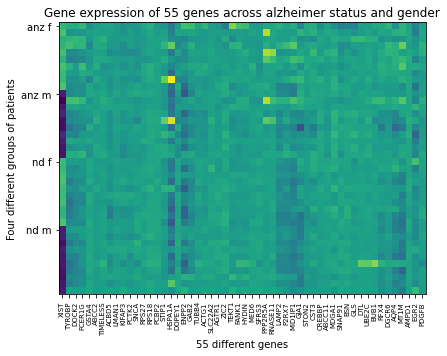

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(['anz f', 'anz m', 'nd f', 'nd m'])

ax.set_xticks(list(range(54)))
ax.set_xticklabels(GENES)
plt.setp(ax.get_xticklabels(), rotation=90, size=7)

ax.set_xlabel("55 different genes")
ax.set_ylabel("Four different groups of patients")
ax.set_title("Gene expression of 55 genes across alzheimer status and gender")

ax.imshow(comb)

## Step 2.

Perform a sample-wise hierarchal clustering using Ward method for the linkage algorithm.
Note that using Ward method can be easily done by choosing the right option from the library.
The outcome should exhibit how the 40 samples from four subgroups
(Male Dementia/ Male Non-Dementia / Female Dementia / Female Non-Dementia) are clustered. 

Using a markdown cell, discuss how you would interpret the outcome,
i.e., is it what you expected to see or not,
i.e., samples from each of the four groups are clustered?

In [22]:
from scipy import cluster
cc = cluster.hierarchy.ward(comb)
print(cc.shape)

# haha okay this will be too difficult with scipy
# let's break out the seaborn magic

(39, 4)


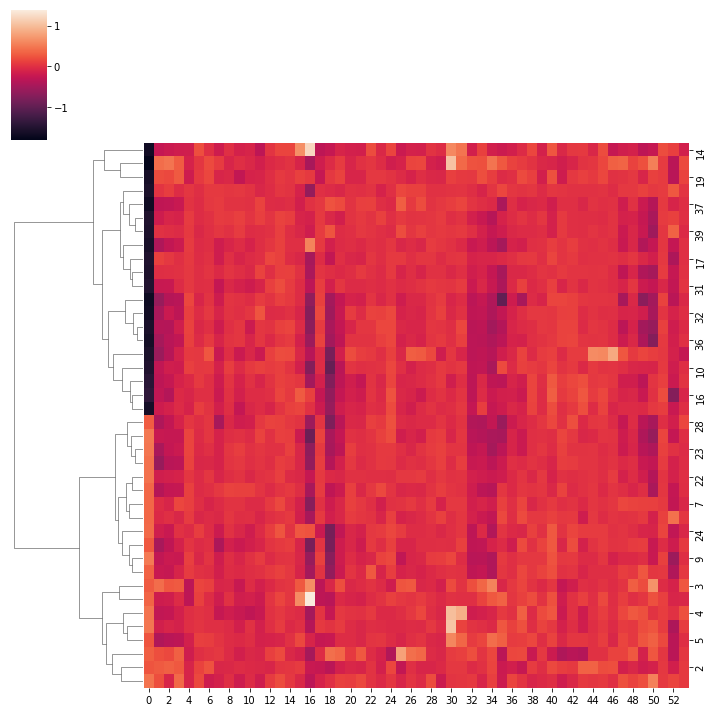

In [55]:
import seaborn
seaborn.clustermap(comb, method='ward', col_cluster=False)

I notice that  the cluster-map cleanly split across the alzheimers and non-alzheimers groups, and then almost cleanly split across gender.

This should be expected (since gene-expression should differ greatly in Alzheimers vs non-Alzheimers, and I believe gene expression also has some sex-based differences.)

---

Also, in case I misunderstood the directions, I also rendered clusters for each group independently:

In [46]:
clean = lambda df: df.values[:, 1:].astype(np.float64)

## Step 3.

Perform a gene-wise hierarchal clustering using Ward method for the linkage algorithm.
It should exhibit how the genes are clustered independent of sample group membership.

Using a markdown cell, discuss how you would interpret the outcome,
i.e., do you notice formation of any subgroups of genes behaving similarly across samples?

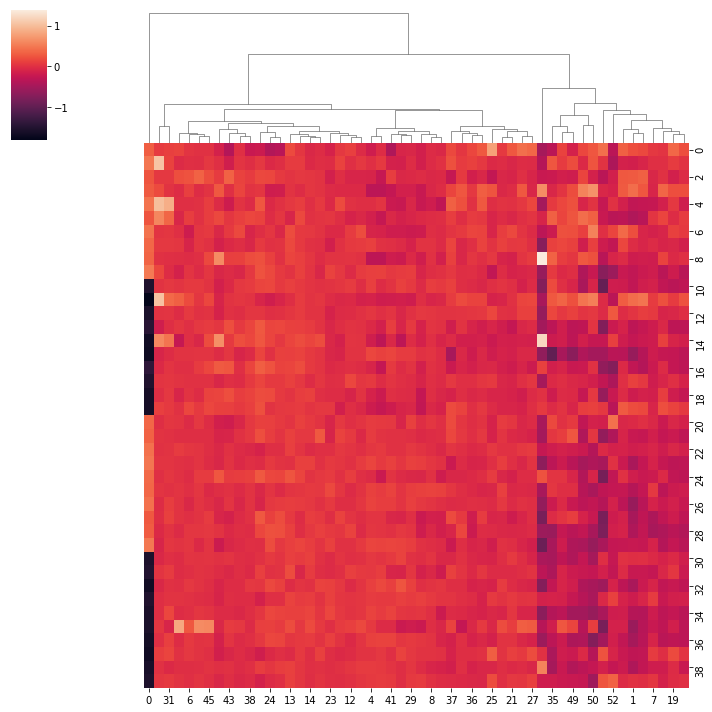

In [57]:
seaborn.clustermap(comb, method='ward', row_cluster=False)

From this perspective, I do see genes forming clusters of patterns of expression.

The clustering across the gene axis is a little harder to interpret meaning from. To me, it looks to me like there are patterns in gene-expression that I can't readily interpret. This would give me good "direction" for further investigation of this high-dimensionality data.

## Step 4.

Perform the ultimate hierarchal clustering by performing both column-wise and genewise clustering.
Again you use Ward method for the linkage algorithm.

Using a markdown cell, discuss how you would interpret the outcome.
For example, can you isolate a group of meaningful genes cutting across gender (M/F)
and/or disease phenotype (Dementia/NonDementia)?

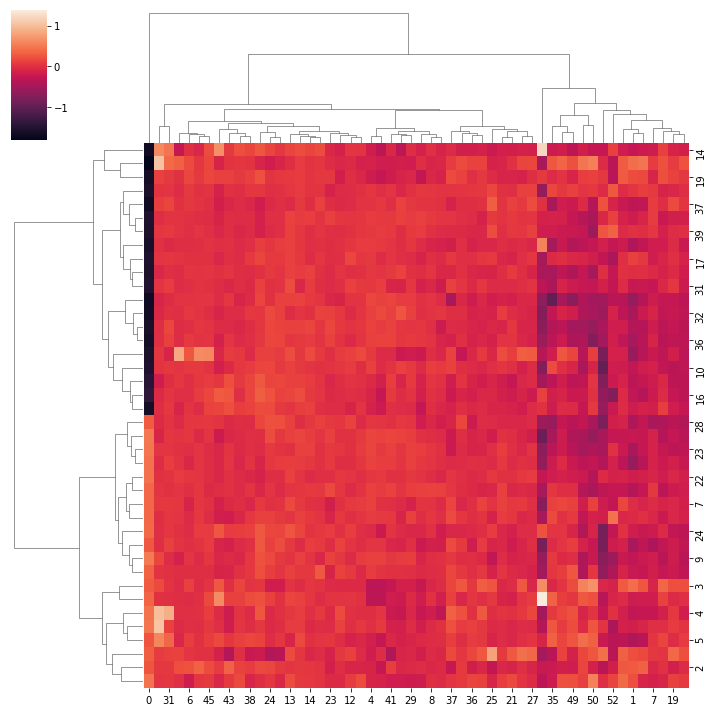

In [58]:
seaborn.clustermap(comb, method='ward')

I do see that some genes seem to exhibit patterns of expression that occur more strongly in males, for example. I also notice that the clustering does not actually change when performed together like this, and my interpretation does not change either.

## Part III: Bayesian Inference

Consider two people, Joe and Jim, who went to cancer screening at different clinics,
Joe for prostate cancer screening and Jim for breast cancer screening.

Male breast cancer is rare
(“less than 1% of all breast cancers occur in men”, https://www.breastcancer.org/symptoms/types/male_bc)
but prostate cancer is common
(“About 6 cases in 10 are diagnosed in men who are 65 or older”, https://www.cancer.org/cancer/prostate-cancer/about/key-statistics.html).

Both heard that their cancer screenings turned out positive.

In this exercise, assume
P(Cancer=Male_breast) = 0.01
and P (Cancer=Male_prostate) = 0.6.

Also assume TPR and TNR for prostate cancer screening are 0.75 and 0.70
and TPR and TNR for breast cancer screening are 0.85 and 0.80, respectively.


## Step 1.

Create a contingency table for Bayesian inferencing for each individual.
You show two tables, one for Joe and one for Jim.

(SCRAP THIS)

I believe the statistics here are being used wrong, (or that my understanding of the description is wrong.)

The variables used in "P(Cancer=Male_breast)" are undefined, 

E.g. "Less than 1% of all breast cancers occur in men" mean that, given any randomly-selected instance of breast cancer, the likelihood of it being a man is $<0.01$.

That is, $\text{Pr}\left[\text{Male} | \text{Breast Cancer}\right] < 0.01$.

Similarly, $\text{Pr}\left[\text{Age }  \geq 65 | \text{Prostate Cancer}\right] \approx 0.60$.

But there are some flaws. Critically **this does not tell us the probabilities assumed!!**

For example, consider 100 cases of breast cancer in a population of 20000 men and 20000 women, with distribution as follows:

| | Man | Woman |
|-|-|-
|Breast cancer    | 1     | 99 |
|No breast cancer | 19999 | 19901 |

In this hypothetical, the following statements are all true:

1. About 1 in 100 cases of breast cancer occur in men
2. About 1 in every 20000 men have breast cancer
3. About 1 in ever 200 women have breast cancer

The URLs linked would actually suggest that "P(Cancer=Male_Breast) = 1/833" and "P(Cancer=Male_Prostate) = 1/8"

The description "P(Cancer=Male_breast)" is difficult to understand since both variables are undefined. So instead, I will list what we know given the description and sources:
 
 * $\text{Pr}\left[\text{Male} | \text{Breast Cancer}\right] = 0.01$

 * $\text{Pr}\left[\text{Age }  \geq 65 | \text{Prostate Cancer}\right] \approx 0.60$

 * $\text{Pr}\left[\text{Breast cancer} | \text{Male}\right] = 1/833$

 * $\text{Pr}\left[\text{Prostate cancer} | \text{Male}\right] = 1/8$
 
 * $\text{Pr}\left[\text{Prostate cancer (male)} | \text{Positive test}\right] = 0.75$
 
 * $\text{Pr}\left[\text{Prostate cancer (male)} | \text{Negative test}\right] = 0.70$
 
 * $\text{Pr}\left[\text{Breast cancer (male)} | \text{Positive test}\right] = 0.85$
 
 * $\text{Pr}\left[\text{Breast cancer (female)} | \text{Negative test}\right] = 0.80$

So, we create two empty contingency tables. We can readily fill in a few values, that is:

1. The sum of positive breast cancer cases ($1/833 \approx 0.0012$)
2. The sum of positive prostate cancer cases ($1/8 \approx 0.125$)
3. Likewise, the sum of negative cases in each

|           | Prostate cancer | No prostate cancer |   Sum |
|-|-|-|-
| Positive  |        |        |   | 
| Negative  |        |        |   | 
| Sum       | 0.125  | 0.875  | 1 |


|           | Breast cancer | No breast cancer |   Sum |
|-|-|-|-
| Positive  |         |        |    | 
| Negative  |         |        |    | 
| Sum       | 0.0012  | 0.9988 | 1 |



We can fill in the values for "true positives" and "true negatives" using simple arithmetic: We have $TPR = TP / P$, and we know $P$ (where $P$ corresponds to the portion of the population that really has cancer). Similarly, $TNR = TN / N$, where $N$ is the portion without cancer.

That is, $TP = TPR * P$ and $TN = TNR * N$. So, we can calculate the following:

 * $\text{Pr}\left[\text{Prostate cancer    AND positive test}\right] = TPR \cdot P = .75 \cdot .125 = 0.09375$
 * $\text{Pr}\left[\text{No prostate cancer AND negative test}\right] = TNR \cdot N = .70 \cdot .875 = 0.6125$
 * $\text{Pr}\left[\text{Breast cancer      AND positive test}\right] = TPR \cdot P = .85 \cdot 1/833   \approx 0.00102$
 * $\text{Pr}\left[\text{No breast cancer   AND negative test}\right] = TNR \cdot N = .80 \cdot 832/833 \approx 0.79904$
 * $\text{Pr}\left[\text{}\right]$

|           | Prostate cancer | No prostate cancer |   Sum |
|-|-|-|-
| Positive  | 0.09375 |        |   | 
| Negative  |         | 0.6125 |   | 
| Sum       | 0.125   | 0.875  | 1 |

|           | Breast cancer | No breast cancer |   Sum |
|-|-|-|-
| Positive  | 0.00102 |         |   | 
| Negative  |         | 0.79904 |   | 
| Sum       | 0.0012  | 0.9988  | 1 |


**Finally**, we can fill in the remaining elements with simple addition and subtraction, to get our final contingency tables:

| Joe       | Prostate cancer | No prostate cancer |   Sum |
|-|-|-|-
| Positive  | 0.09375 | 0.2625 | .35625 | 
| Negative  | 0.03125 | 0.6125 | .64375 | 
| Sum       | 0.12500 | 0.875  | 1 |

| Jim       | Breast cancer | No breast cancer |   Sum |
|-|-|-|-
| Positive  | 0.00102 | 0.19976 | 0.20078 | 
| Negative  | 0.00018 | 0.79904 | 0.79922 | 
| Sum       | 0.00120 | 0.99880 | 1 |

In [62]:
# And let's encode them in this manner
# where cc[0 if negative test, 1 if positive test][0 if no-cancer, 1 if yes-cancer]
cjoe = np.array([[.6125, .03125], [.2625, .09375]])
cjim = np.array([[.8*832/833, .15/833], [.2*832/83, .85/833]])

0.612
0.031
0.262
0.094


## Step 2.

This time, convert each contingency table you created in Step 1
into a grid-based plot designed to visualize Bayesian inference.

Show two 20x20 grid-based illustrations “side by side” to contrast the two cases.
You are illustrating Bayesian inferencing using the population size of 400 people in each case,
following the discussion we had in class.

Coloring of dots properly should differentiate TP/FP/FN/TN cases
(i.e., treating dots as people belong to each of these four cases).
Suggested colors for dots are: TP – red, FP – blue, FN – maroon, and TN – gray
following the convention used in “Example 2 – Drug testing” in lecture slide.

Boxing the dots using the code given in the class to label the cancer population $(TP \cup FN)$ 
and/or non-cancer population $(TN \cup FP)$ can be done for **extra credit.**
Using the boxing to label the groups is not required.

Make sure the titles of plots include person name
and $\mathbb{P}( \text{Cancer}=\text{yes} | \text{test}=\text{positive} )$, 
i.e., the probability that the person has cancer upon hearing the positive screening outcome news.

## Step 3.
Using a markdown cell, discuss what you can say with the two 20x20 grid-based plots you are contrasting,
e.g., the impact of prior vs. likelihood in computing the posterior. 

---

# Various useful resources

## **Computing degrees of freedom**:

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

There is an error in this URL post. The corrected and “augmented”
version is here. Setting the variables A and B is included:

```
from statistics import mean

import math
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)
 
A = Alz # includes values for Alzheimers’
B = ND # includes values for Non-Dementia

print('Degrees of freedom for Student-t distribution: ' + str(degreesOfFreedom(A, B)))
```

## Plotting t-test PDF:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

You can use 0.001 and 0.999 instead of 0.01 and 0.99 to stretch tails.

```
x = np.linspace(
    t.ppf(0.001, df),
    t.ppf(0.999, df), 100)
```

## Calculating Critical Region:

https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/

Note: You use two tail t-test since you do not care if test sample
distribution is larger or smaller than the control sample
distribution; you care only different or not. In case of one tail, you
set p=0.95. In case of two tail test, you set p = 0.975 for the
critical region calculation